In [1]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [2]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [3]:
# Set up random seed to 1008. Do not change the random seed.
seed = 1008
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed_all(seed)

# 1. Full, slice, fill
Write a function `warm_up` that returns the 2D tensor with integers below. **Do not use any loops**.

```
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
```


Hint: Use `torch.full`, `torch.fill_`, and the slicing operator.

In [4]:
def warm_up():
    # raise NotImplementedError()
    x = torch.zeros((13, 13))
    # fill 1s
    index = torch.tensor([i for i in range(13)])
    x.index_fill_(1, index, 1)
    # fill 2s
    index = torch.tensor([1, 6, 11])
    x.index_fill_(0, index, 2)
    x.index_fill_(1, index, 2)
    # slicing to fill 3s
    x[3:5, 3:5] = 3
    x[3:5, 8:10] = 3
    x[8:10, 3:5] = 3
    x[8:10, 8:10] = 3
    x = x.byte()
    return x
# Uncomment line below once you implement this function. 
print(warm_up())

tensor([[1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1]], dtype=torch.uint8)


# 2. To Loop or not to loop

## 2.1. `mul_row_loop`
Write a function `mul_row_loop`, using python loops (and not even slicing operators), that gets a 2D tensor
as input, and returns a tensor of same size, equal to the one given as argument, with the first row
kept unchanged, the second multiplied by two, the third by three, etc.
For instance:
```
>>> t = torch.full((4, 8), 2.0)
>>> t
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.]])
>>> mul_row(t)
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[4., 4., 4., 4., 4., 4., 4., 4.],
[6., 6., 6., 6., 6., 6., 6., 6.],
[8., 8., 8., 8., 8., 8., 8., 8.]])
```

In [38]:
def mul_row_loop(input_tensor):
    # raise NotImplementedError()
    # input tensor is a 2D tensor
    cols = torch.Tensor.size(input_tensor)[1]
    output_tensor = torch.Tensor() # initialize an empty tensor
    for index, row in enumerate(input_tensor):
        row = row * (index + 1)
        output_tensor = torch.cat((output_tensor, row), 0) 
    return output_tensor.view([4, -1]) # reshape the tensor to the required shape

In [39]:
# Test
t = torch.full((4, 8), 2.0)
mul_row_loop(t)

tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])

# 2.2. `mul_row_fast`
Write a second version of the same function named `mul_row_fast` which uses tensor operations and no looping.

**Hint**: Use broadcasting and `torch.arange`, `torch.view`, and `torch.mul`.

In [40]:
def mul_row_fast(input_tensor):
    # raise NotImplementedError()
    rows = torch.Tensor.size(input_tensor)[0]
    mul_tensor = torch.arange(1, rows+1)
    # reshape mul_tensor
    mul_tensor = mul_tensor.view([-1,1])
    mul_tensor = mul_tensor.float()
    output_tensor = torch.mul(input_tensor, mul_tensor)
    return output_tensor

In [41]:
# Test
t = torch.full((4, 8), 2.0)
mul_row_fast(t)
# torch.mul is not the matrix multiplication!!!

tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])

# 2.3. `times`
Write a function `times` which takes a 2D tensor as input and returns the run times of `mul_row_loop` and `mul_row_fast` on this tensor, respectively. Use `time.perf_counter`.

Use `torch.ones` to create a 2D tensor of size (1000, 400) full of ones and run `times` on it (there should be more than two orders of magnitude difference).

In [42]:
import time
from time import perf_counter

def times(input_tensor):
    # raise NotImplementedError()
    t1 = time.perf_counter()
    output_slow = mul_row_loop(input_tensor)
    t2 = time.perf_counter()
    
    t3 = time.perf_counter()
    output_fast = mul_row_fast(input_tensor)
    t4 = time.perf_counter()
    return t2-t1, t4-t3
# Uncomment lines below once you implement this function. 
input_tensor = torch.ones(1000, 400)
time_1, time_2 = times(input_tensor)
print('{}, {}'.format(time_1, time_2))

1.1453605849999917, 0.0004125199999975848


# 3. Non-linearities

## 3.1. ReLU
ReLU (Rectified Linear Unit) is a non-linear activation fuction defined as:

$$y = \mathrm{max}(0,x)$$

Define a fully connected neural network `linear_fc_relu` which:
- takes 2 dimensional data as input and passes it through linear modules (`torch.nn.Linear`)
- has one hidden layer of dimension 5 
- has output dimension of 2
- has ReLu as an activation function

Create a tensor with input data $X$ of size (100, 2) using `torch.randn`. 

Following the example in https://github.com/Atcold/pytorch-Deep-Learning-Minicourse/blob/master/02-space_stretching.ipynb, visualize the output of passing `X` through the neural network `linear_fc_relu`.

In [43]:
# set up the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [44]:
# Input data
X = torch.randn(100, 2)

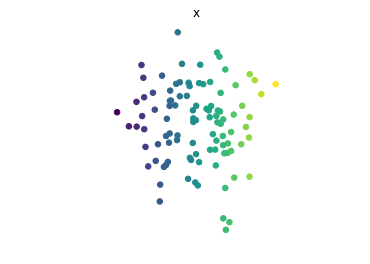

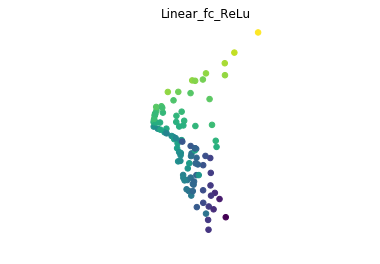

In [45]:
# create 1-layer neural networks with ReLU activation
colors = X[:, 0]
# initial points
show_scatterplot(X, colors, title='x')

hidden_nn = 5
# ReLu
NL = nn.ReLU()
linear_fc_relu = nn.Sequential(
    # linear 
    nn.Linear(2, hidden_nn),
    NL,
    nn.Linear(hidden_nn, 2)
    )
linear_fc_relu.to(device)
# Visualize: TODO
with torch.no_grad():
    Y = linear_fc_relu(X)
show_scatterplot(Y, colors, title='Linear_fc_ReLu')

## 3.2. Sigmoid
The sigmoid function is another popular choice for a non-linear activation function which maps its input to values in the interval $(0,1)$. It is formally defined as:

$$\sigma(x) = \frac{1}{1+ e^{-x}}$$

Define a new neural network `linear_fc_sigmoid` which is the same architecture as in part `3.1.` but with a sigmoid unit instead of ReLU. 

Using the same $X$ as in part `3.1`, visualize the output of passing `X` through the neural network `linear_fc_sigmoid`.

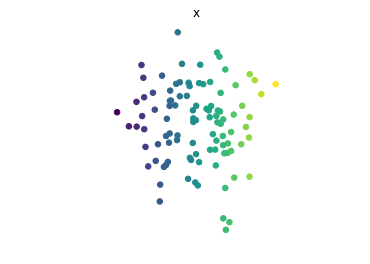

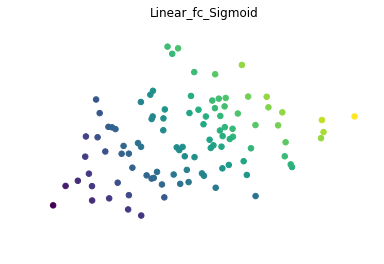

In [46]:
# create 1-layer neural networks with Sigmoid activation
show_scatterplot(X, colors, title="x")

hidden_nn = 5
# Sigmoid
NL = nn.Sigmoid()
linear_fc_sigmoid = nn.Sequential(
    nn.Linear(2, hidden_nn),
    NL,
    nn.Linear(hidden_nn, 2)    
    )
# Visualize: TODO
with torch.no_grad():
    Y = linear_fc_sigmoid(X)
show_scatterplot(Y, colors, title="Linear_fc_Sigmoid")